<a href="https://colab.research.google.com/github/anmolag190153/Job_changers_classifier/blob/main/Jobs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train=pd.read_csv('/content/drive/My Drive/Jobs_dataset/aug_train.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
train.shape

(19158, 14)

In [7]:
print(train.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [8]:
import seaborn as sns


In [10]:
train['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

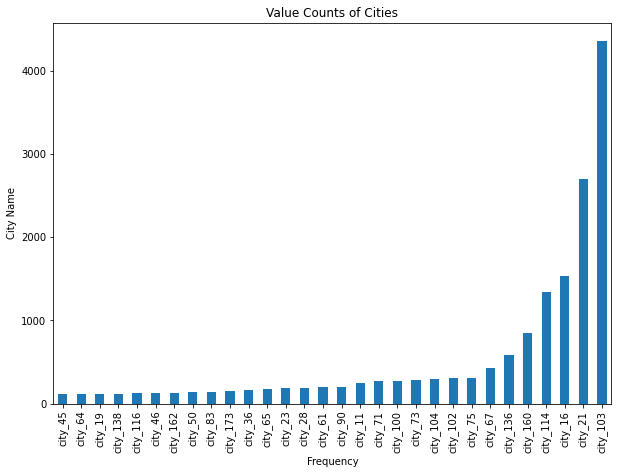

In [15]:
plt.figure(figsize=(10,7))
#print(train['city'].value_counts()[:30].sort_values(ascending=True))
train['city'].value_counts()[:30].sort_values(ascending=True).plot(kind='bar')
plt.title('Value Counts of Cities')
plt.xlabel('Frequency')
plt.ylabel('City Name');

In [16]:
train['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [18]:
train['gender'].fillna('na',inplace=True)

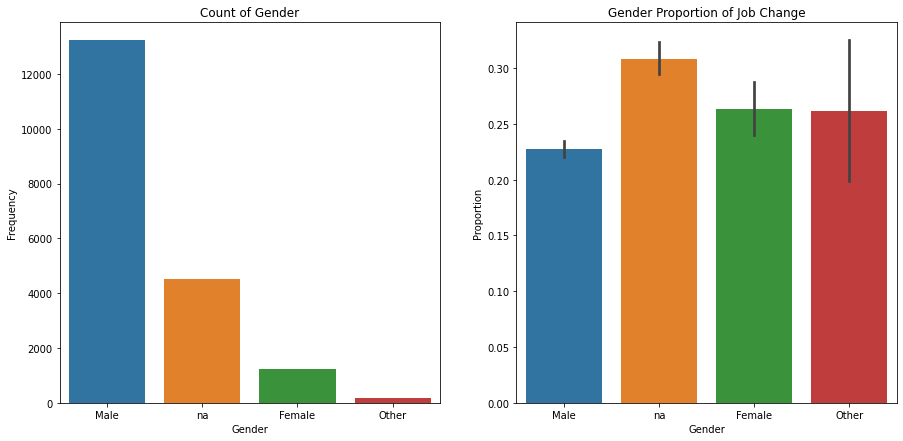

In [20]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, x='gender')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency');

plt.subplot(122)
sns.barplot(data=train, x='gender', y='target')
plt.title('Gender Proportion of Job Change')
plt.xlabel('Gender')
plt.ylabel('Proportion');

In [21]:
gender_table = pd.crosstab(train['gender'], train['target'])
gender_table

target,0.0,1.0
gender,,
Female,912,326
Male,10209,3012
Other,141,50
na,3119,1389


In [23]:
from scipy import stats
from scipy.stats import chi2_contingency

_ , p, _, _ = chi2_contingency(gender_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 2.83304872204523e-25
Dependent (reject H0)


In [24]:
print(train['relevent_experience'].value_counts())

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


In [25]:
train['relevent_experience'] = train['relevent_experience'].replace('Has relevent experience', 1)
train['relevent_experience'] = train['relevent_experience'].replace('No relevent experience', 0)

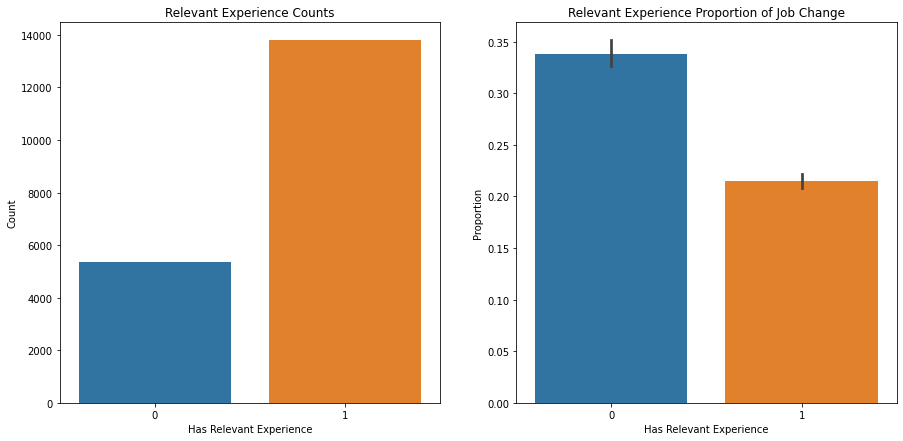

In [26]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, x='relevent_experience')
plt.title('Relevant Experience Counts')
plt.xlabel('Has Relevant Experience')
plt.ylabel('Count');

plt.subplot(122)
sns.barplot(data=train, x='relevent_experience', y='target')
plt.title('Relevant Experience Proportion of Job Change')
plt.xlabel('Has Relevant Experience')
plt.ylabel('Proportion');

In [29]:
exp_table = pd.crosstab(train['relevent_experience'], train['target'])

_, p, _, _ = chi2_contingency(exp_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 1.5006628411178982e-70
Dependent (reject H0)


In [30]:
train['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [31]:
train['enrolled_university'].fillna('na', inplace=True)
train['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
na                    386
Name: enrolled_university, dtype: int64

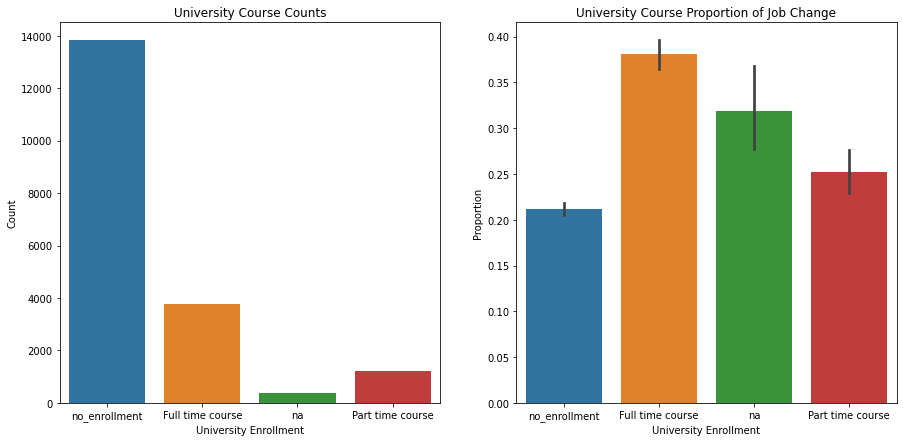

In [32]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, x='enrolled_university')
plt.title('University Course Counts')
plt.xlabel('University Enrollment')
plt.ylabel('Count');


plt.subplot(122)
sns.barplot(data=train, x='enrolled_university', y='target')
plt.title('University Course Proportion of Job Change')
plt.xlabel('University Enrollment')
plt.ylabel('Proportion');

In [34]:
enrolled_table = pd.crosstab(train['enrolled_university'],train['target'])
_, p, _, _ = chi2_contingency(enrolled_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 3.809312475442323e-100
Dependent (reject H0)


In [36]:
train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [37]:
train['education_level'].fillna('na', inplace=True)
train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
na                  460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

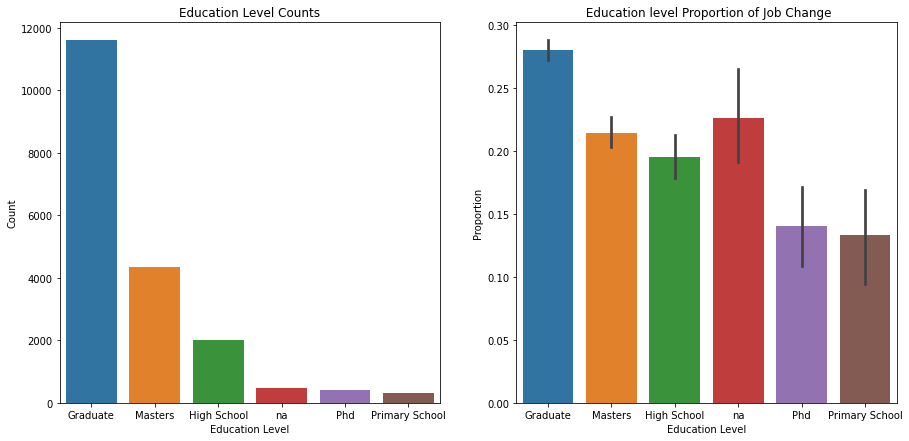

In [38]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, x='education_level')
plt.title('Education Level Counts')
plt.xlabel('Education Level')
plt.ylabel('Count');


plt.subplot(122)
sns.barplot(data=train, x='education_level', y='target')
plt.title(' Education level Proportion of Job Change')
plt.xlabel('Education Level')
plt.ylabel('Proportion');

In [39]:
edu_table = pd.crosstab(train['education_level'],train['target'])
_, p, _, _ = chi2_contingency(edu_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 2.787356885121268e-34
Dependent (reject H0)


In [41]:
train['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [42]:
train['major_discipline'].fillna('na', inplace=True)
train['major_discipline'].value_counts()

STEM               14492
na                  2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

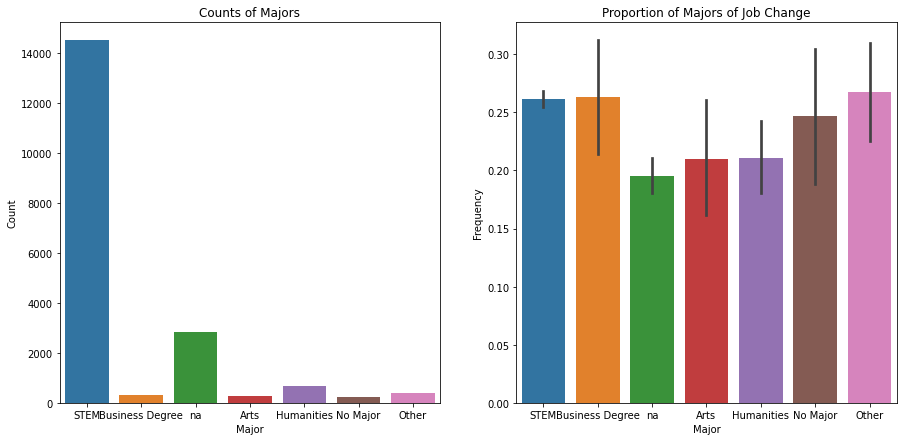

In [44]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, x='major_discipline')
plt.title('Counts of Majors')
plt.xlabel('Major')
plt.ylabel('Count');

plt.subplot(122)
sns.barplot(data=train, x='major_discipline', y='target')
plt.title('Proportion of Majors of Job Change')
plt.xlabel('Major')
plt.ylabel('Frequency');

In [45]:
major_table = pd.crosstab(train['major_discipline'],train['target'])
stat, p, dof, expected = chi2_contingency(major_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 6.22453676130265e-12
Dependent (reject H0)


In [46]:
train['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [47]:
train['company_size'].fillna('na', inplace=True)
train['company_size'].value_counts()

na           5938
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

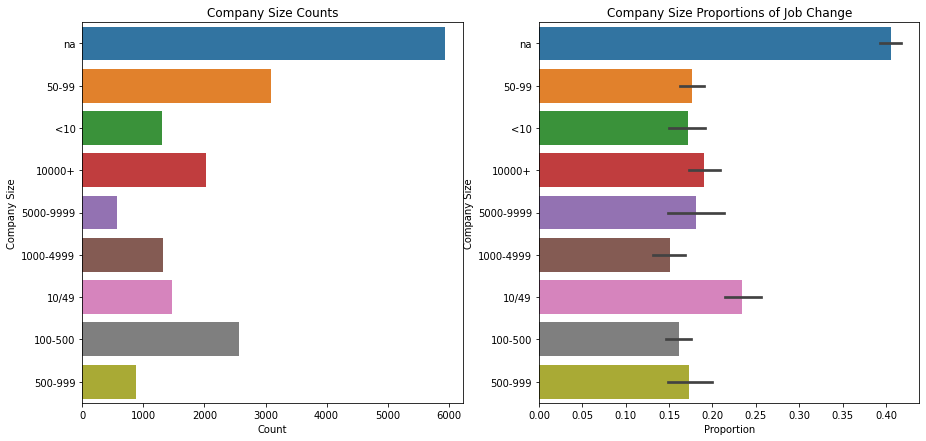

In [48]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.countplot(data=train, y='company_size')
plt.title('Company Size Counts')
plt.xlabel('Count')
plt.ylabel('Company Size');

plt.subplot(122)
sns.barplot(data=train, y='company_size', x='target')
plt.title('Company Size Proportions of Job Change')
plt.xlabel('Proportion')
plt.ylabel('Company Size');

In [49]:
comp_size_table = pd.crosstab(train['company_size'],train['target'])
stat, p, dof, expected = chi2_contingency(comp_size_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 1.5874534712450328e-245
Dependent (reject H0)


In [50]:
print(train['company_type'].value_counts())
train['company_type'].fillna('na', inplace=True)

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64


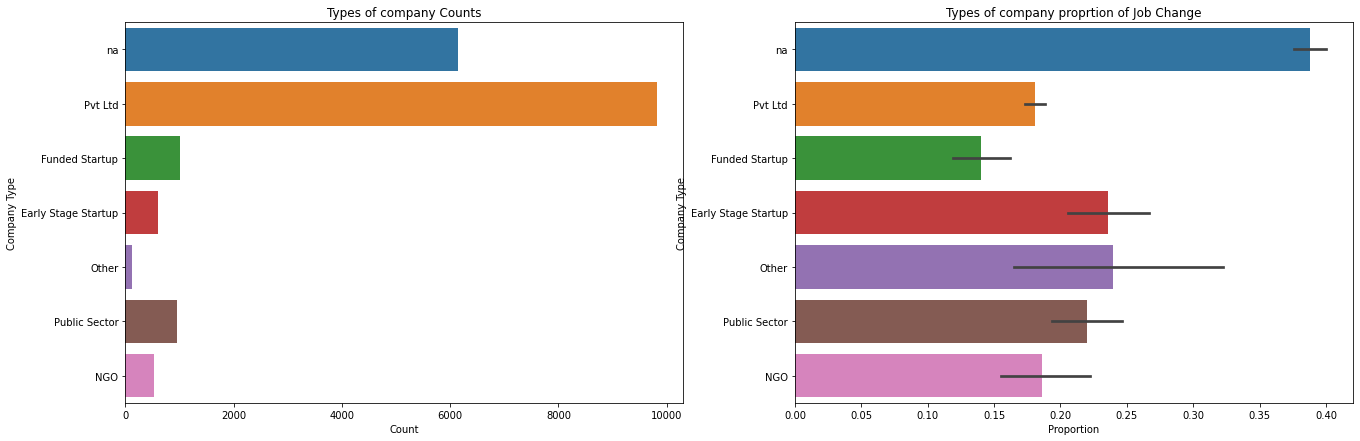

In [51]:
plt.figure(figsize=(22,7))

plt.subplot(121)
sns.countplot(data=train, y='company_type')
plt.title('Types of company Counts')
plt.xlabel('Count')
plt.ylabel('Company Type');

plt.subplot(122)
sns.barplot(data=train, y='company_type', x='target')
plt.title('Types of company proprtion of Job Change')
plt.xlabel('Proportion')
plt.ylabel('Company Type');

In [52]:
comp_type_table = pd.crosstab(train['company_type'],train['target'])
stat, p, dof, expected = chi2_contingency(comp_type_table)

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 4.351920136429758e-204
Dependent (reject H0)


count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64


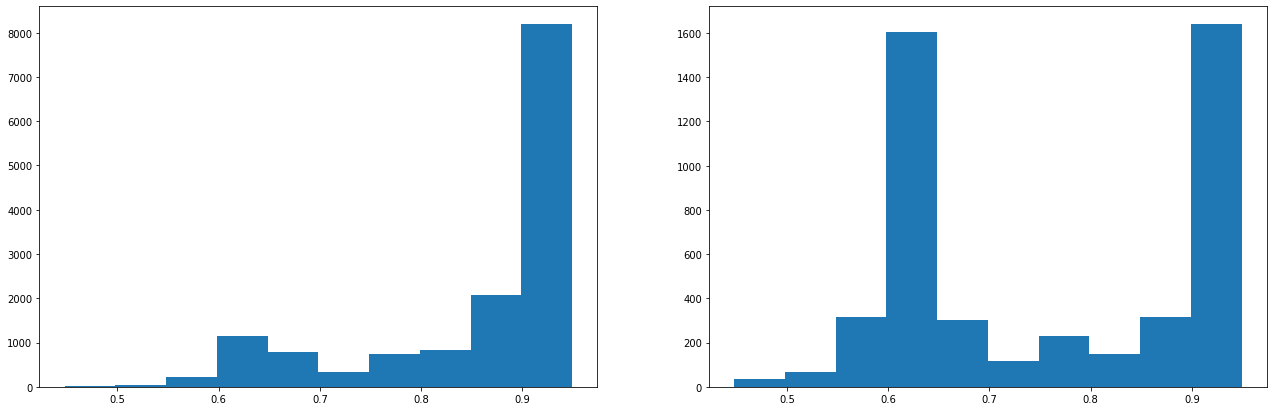

In [53]:
print(train['city_development_index'].describe())
plt.figure(figsize=(22,7))

plt.subplot(121)
plt.hist(data=train[train['target'] == 0], x='city_development_index')

plt.subplot(122)
plt.hist(data=train[train['target'] == 1], x='city_development_index');

In [56]:
print(train['experience'].value_counts())
train['experience'] = train['experience'].replace('>20', 21)
train['experience'] = train['experience'].replace('<1', 21)
train['experience'] = train['experience'].fillna(np.random.choice(['experience']))
train['experience'] = train['experience'].astype('float64')

21    3873
5     1430
4     1403
3     1354
6     1216
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
1      549
16     508
12     494
13     399
17     342
19     304
18     280
20     148
Name: experience, dtype: int64


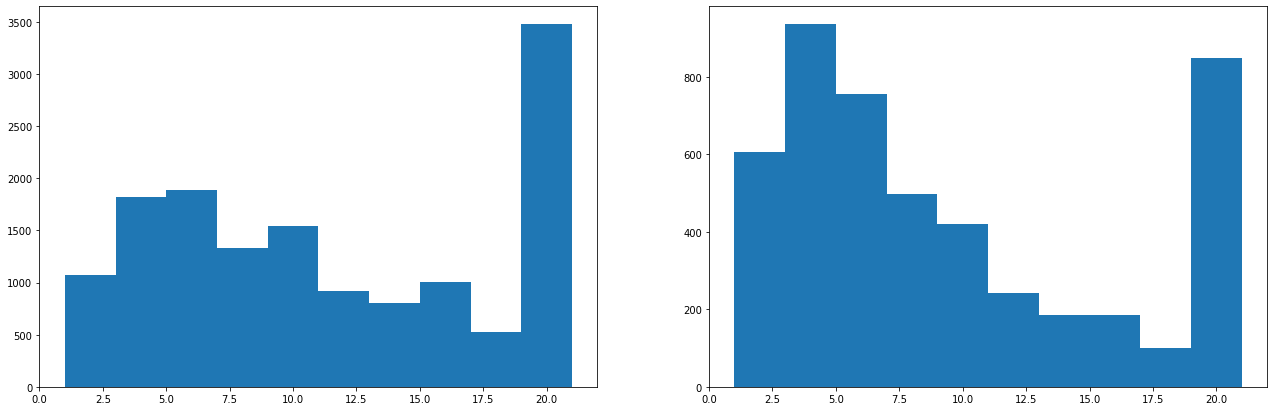

In [57]:
plt.figure(figsize=(22,7))

plt.subplot(121)
plt.hist(data=train[train['target'] == 0], x='experience')

plt.subplot(122)
plt.hist(data=train[train['target'] == 1], x='experience');

In [58]:
print(train['last_new_job'].value_counts())
train['last_new_job'] = train['last_new_job'].replace('>4', 5)
train['last_new_job'] = train['last_new_job'].replace('never', 0)
train['last_new_job'] = train['last_new_job'].fillna(np.random.choice(train['last_new_job']))
train['last_new_job'] = train['last_new_job'].astype('float64')

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64


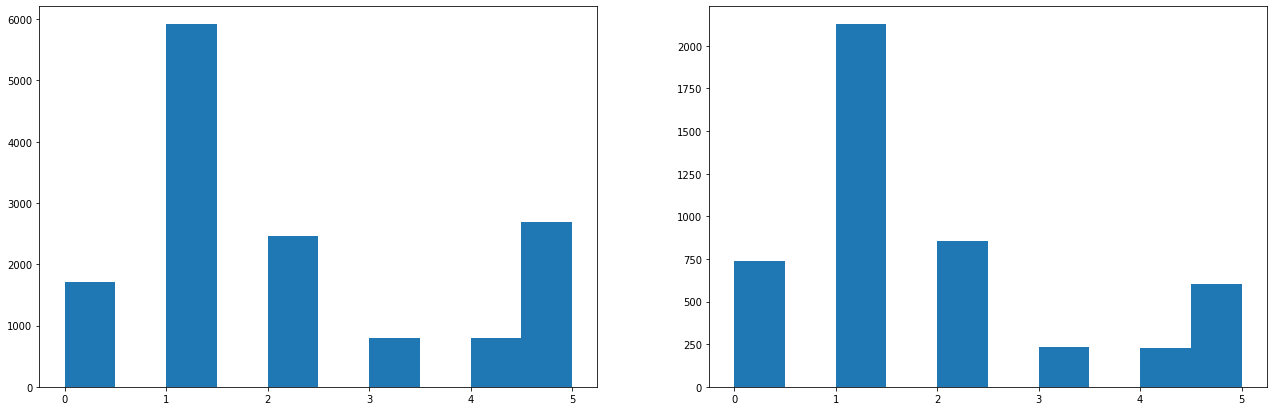

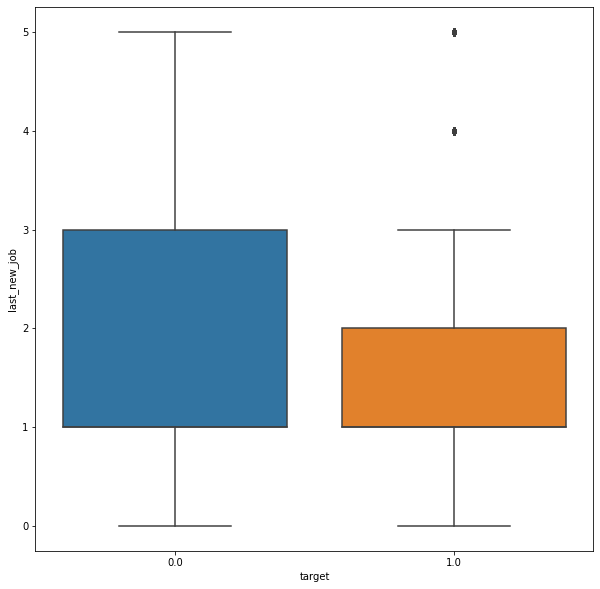

In [61]:
plt.figure(figsize=(22,7))

plt.subplot(121)
plt.hist(data=train[train['target'] == 0], x='last_new_job')

plt.subplot(122)
plt.hist(data=train[train['target'] == 1], x='last_new_job');
plt.figure(figsize=(10,10))
sns.boxplot(data=train, x='target', y='last_new_job');

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64


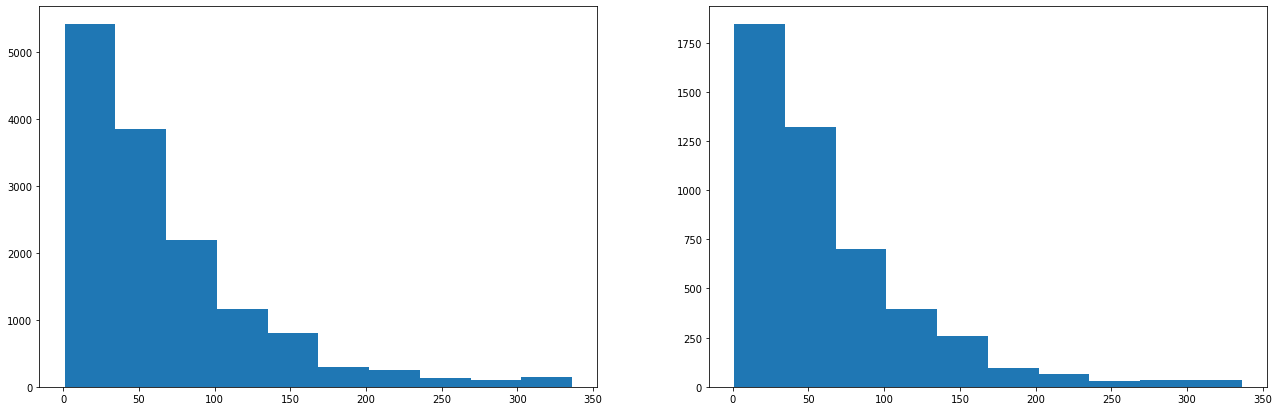

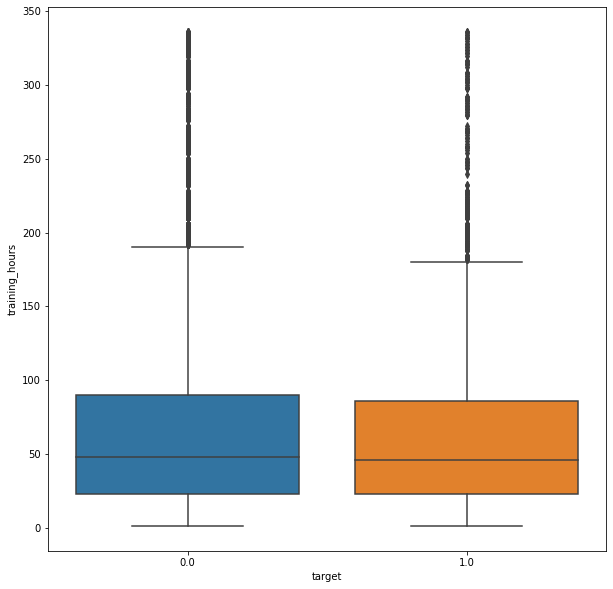

In [62]:
print(train['training_hours'].describe())
plt.figure(figsize=(22,7))

plt.subplot(121)
plt.hist(data=train[train['target'] == 0], x='training_hours')

plt.subplot(122)
plt.hist(data=train[train['target'] == 1], x='training_hours');

plt.figure(figsize=(10,10))
sns.boxplot(data=train, x='target', y='training_hours')

In [63]:
train[['male', 'other_gender', 'na_gender']] = pd.get_dummies(train['gender'])[['Male', 'Other', 'na']]

train[['no_enrollment', 'Full time course', 'Part time course']] = pd.get_dummies(train['enrolled_university'])[['no_enrollment', 'Full time course', 'Part time course']]

train[['Graduate','High School','Phd','Primary School','na_edu_level']] = pd.get_dummies(train['education_level'])[['Graduate','High School','Phd','Primary School','na']]

train[['Humanities', 'Other', 'Business Degree','Arts', 'No Major', 'na_major']] = pd.get_dummies(train['major_discipline'])[['Humanities', 'Other', 'Business Degree','Arts', 'No Major', 'na']]

train[['csize_na', 'csize_50-99', 'csize_100-500', 'csize_10000+', 'csize_1000-4999', 'csize_<10', 'csize_500-999', 'csize_5000-9999']] = pd.get_dummies(train['company_size'])[['na', '50-99', '100-500', '10000+', '1000-4999', '<10', '500-999', '5000-9999']]

train[['ctype_Pvt Ltd', 'ctype_Funded Startup', 'ctype_Public Sector', 'ctype_Early Stage Startup', 'ctype_NGO', 'ctype_Other']] = pd.get_dummies(train['company_type'])[['Pvt Ltd', 'Funded Startup', 'Public Sector', 'Early Stage Startup', 'NGO','Other']]

In [140]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, make_scorer, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

X = train[['city_development_index','experience','last_new_job','training_hours', 'male', 'other_gender',
       'na_gender', 'relevent_experience', 'no_enrollment',
       'Full time course', 'Part time course', 'Graduate', 'High School',
       'Phd', 'Primary School', 'na_edu_level', 'Humanities', 'Other',
       'Business Degree', 'Arts', 'No Major', 'na_major', 'csize_na',
       'csize_50-99', 'csize_100-500', 'csize_10000+', 'csize_1000-4999',
       'csize_<10', 'csize_500-999', 'csize_5000-9999', 'ctype_Pvt Ltd',
       'ctype_Funded Startup', 'ctype_Public Sector',
       'ctype_Early Stage Startup', 'ctype_NGO', 'ctype_Other']]

y = train['target']

x_train, x_val, y_train, y_val = train_test_split(X,y, test_size=.20, random_state=9)


In [141]:
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_val=Scaler.fit_transform(x_val)



In [142]:

lr=LogisticRegression(random_state=2021,max_iter=1000)
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_val)
print(classification_report(y_val,y_pred))
print(model.score(x_train,y_train))
print(model.score(x_val,y_val))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      2843
         1.0       0.60      0.26      0.36       989

    accuracy                           0.76      3832
   macro avg       0.69      0.60      0.61      3832
weighted avg       0.74      0.76      0.73      3832

0.7717604071512463
0.7638308977035491


In [143]:
knn_model = KNeighborsClassifier(n_neighbors=50)
model=knn_model.fit(x_train,y_train)
y_pred=model.predict(x_val)
print(classification_report(y_val,y_pred))
print(model.score(x_train,y_train))
print(model.score(x_val,y_val))

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      2843
         1.0       0.57      0.28      0.38       989

    accuracy                           0.76      3832
   macro avg       0.68      0.60      0.61      3832
weighted avg       0.73      0.76      0.73      3832

0.7776327808952107
0.7604384133611691


In [144]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10 )
model=tree_model.fit(x_train,y_train)
y_pred=model.predict(x_val)
print(classification_report(y_val,y_pred))
print(model.score(x_train,y_train))
print(model.score(x_val,y_val))

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      2843
         1.0       0.57      0.29      0.38       989

    accuracy                           0.76      3832
   macro avg       0.68      0.61      0.62      3832
weighted avg       0.73      0.76      0.73      3832

0.7908129975205533
0.7606993736951984


In [145]:
rf_model = RandomForestClassifier(n_estimators=100)
model=rf_model.fit(x_train,y_train)
y_pred=model.predict(x_val)
print(classification_report(y_val,y_pred))
print(model.score(x_train,y_train))
print(model.score(x_val,y_val))

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85      2843
         1.0       0.57      0.26      0.35       989

    accuracy                           0.76      3832
   macro avg       0.67      0.59      0.60      3832
weighted avg       0.73      0.76      0.72      3832

0.9982382878768107
0.7575678496868476


In [146]:
import tensorflow as tf
from tensorflow import keras



def build_fc_model(input_shape=(36,1), num_class=2):
    
    
    model=tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(512,activation='relu',input_shape=input_shape,kernel_regularizer=tf.keras.regularizers.l2(1e-2)),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(num_class,activation='softmax')
                                    ])

    return model

In [133]:
model=build_fc_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=256,validation_data=(x_val,y_val))

Epoch 1/100
60/60 [==============================] - 2s 26ms/step - loss: 1.2320 - accuracy: 0.7590 - val_loss: 0.8553 - val_accuracy: 0.7641
Epoch 2/100
60/60 [==============================] - 1s 24ms/step - loss: 0.7006 - accuracy: 0.7772 - val_loss: 0.6011 - val_accuracy: 0.7664
Epoch 3/100
60/60 [==============================] - 1s 24ms/step - loss: 0.5529 - accuracy: 0.7774 - val_loss: 0.5240 - val_accuracy: 0.7646
Epoch 4/100
60/60 [==============================] - 1s 23ms/step - loss: 0.5016 - accuracy: 0.7817 - val_loss: 0.4946 - val_accuracy: 0.7659
Epoch 5/100
60/60 [==============================] - 1s 23ms/step - loss: 0.4859 - accuracy: 0.7772 - val_loss: 0.4823 - val_accuracy: 0.7743
Epoch 6/100
60/60 [==============================] - 1s 23ms/step - loss: 0.4744 - accuracy: 0.7810 - val_loss: 0.4793 - val_accuracy: 0.7717
Epoch 7/100
60/60 [==============================] - 1s 22ms/step - loss: 0.4698 - accuracy: 0.7821 - val_loss: 0.4752 - val_accuracy: 0.7675
Epoch 

In [148]:
from sklearn.svm import SVC
print(x_train.shape)
svclassifier=SVC(kernel='rbf')
model=svclassifier.fit(x_train, y_train)
y_pred=model.predict(x_val)
print(classification_report(y_val,y_pred))
print(model.score(x_train,y_train))
print(model.score(x_val,y_val))

(15326, 36)
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      2843
         1.0       0.58      0.31      0.41       989

    accuracy                           0.76      3832
   macro avg       0.69      0.62      0.63      3832
weighted avg       0.74      0.76      0.74      3832

0.7921832180608117
0.7633089770354906
